In [10]:
# Import Modules

import time
import warnings

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import cluster, datasets
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice

np.random.seed(0)

In [11]:
# Generate Data Sets

n_samples = 1500
random_state1 = 170
random_state2 = 8

# Circles

noisy_circles = datasets.make_circles(n_samples = n_samples, factor = 0.5, noise = 0.05)

# Moons

noisy_moons = datasets.make_moons(n_samples = n_samples, noise = 0.05)

# Blobs (with varied variances)

varied = datasets.make_blobs(n_samples = n_samples, cluster_std = [1.0, 2.5, 0.5], random_state=random_state1)

# Blobs (Anisotropicly distributed)

X, y = datasets.make_blobs(n_samples=n_samples, random_state = random_state1)

transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)

aniso = (X_aniso, y)

# Blobs (with equal variances)

blobs = datasets.make_blobs(n_samples = n_samples, random_state = random_state2)

# Random 2D Data

no_structure = np.random.rand(n_samples, 2), None

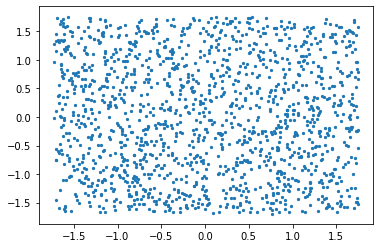

In [28]:
plt.figure()
X, y = no_structure
X = StandardScaler().fit_transform(X)
plt.scatter(X[:, 0], X[:, 1], s = 5)

(array([[ 5.86749807,  8.17715188],
        [ 5.61369982,  9.93295527],
        [ 7.22508428, 10.44886194],
        ...,
        [ 7.73674097, 10.82855388],
        [-4.61701094, -9.64855983],
        [-3.48640175, -9.25766922]]),
 array([0, 0, 0, ..., 0, 2, 2]))

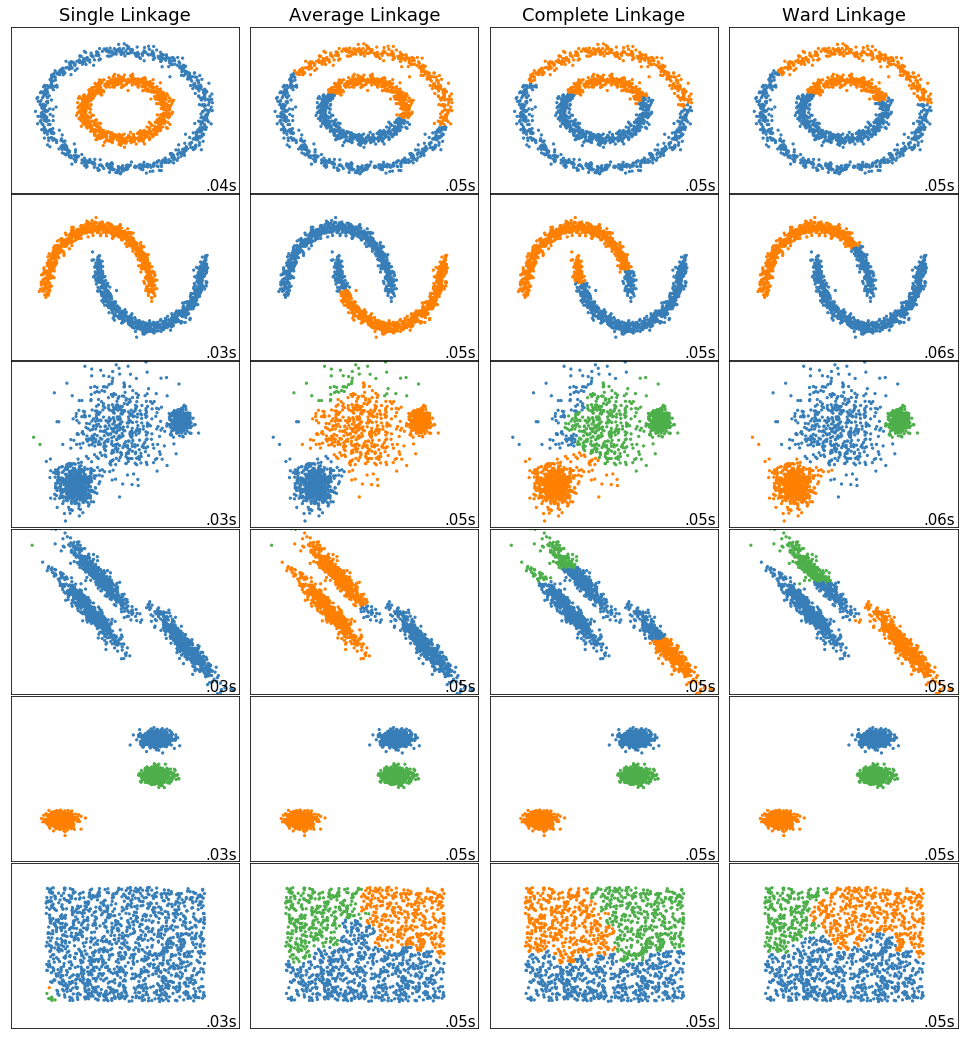

In [21]:
# Set up cluster parameters

# Plot init

plt.figure(figsize=(9 * 1.3 + 2, 14.5))
plt.subplots_adjust(left=.02, right=.98, bottom=.001, top=.96, wspace=.05, hspace=.01)
plot_num = 1

# Parameters Dictionary

params_base = {'n_neighbors': 10,
                'n_clusters': 3}

# List with tuples (datasets and parameters)

datasets = [
    (noisy_circles, {'n_clusters': 2}),
    (noisy_moons, {'n_clusters': 2}),
    (varied, {'n_neighbors': 2}),
    (aniso, {'n_neighbors': 2}),
    (blobs, {}),
    (no_structure, {})]

# Iterate list of datasets and paratemeters

for i_dataset, (dataset, algorithm_parameters) in enumerate(datasets):
    
    # Update parameters with dataset-specific values
    params = default_base.copy()
    params.update(algorithm_parameters)
    
    # Get dataSet and normalize it
    X, y = dataset
    X = StandardScaler().fit_transform(X)

    # Create cluster objects
    ward = cluster.AgglomerativeClustering(n_clusters = params['n_clusters'], linkage='ward')
    complete = cluster.AgglomerativeClustering(n_clusters=params['n_clusters'], linkage='complete')
    average = cluster.AgglomerativeClustering(n_clusters=params['n_clusters'], linkage='average')
    single = cluster.AgglomerativeClustering(n_clusters=params['n_clusters'], linkage='single')
    
    # List with tuples (algorithm's names and objects)
    clustering_algorithms = (
        ('Single Linkage', single),
        ('Average Linkage', average),
        ('Complete Linkage', complete),
        ('Ward Linkage', ward),
    )
    
    # Itarate each algorithm at a dataset
    for name, algorithm in clustering_algorithms:
        
        t0 = time.time()

        # catch warnings related to kneighbors_graph
        with warnings.catch_warnings():
            
            warnings.filterwarnings(
                "ignore",
                message="the number of connected components of the " +
                "connectivity matrix is [0-9]{1,2}" +
                " > 1. Completing it to avoid stopping the tree early.",
                category=UserWarning)
            
            # Fit algorithm to data
            algorithm.fit(X)

        t1 = time.time()
        
        # Do prediction step
        if hasattr(algorithm, 'labels_'):
            y_pred = algorithm.labels_.astype(np.int)
        else:
            y_pred = algorithm.predict(X)
            
        # Indicate wich subplot
        plt.subplot(len(datasets), len(clustering_algorithms), plot_num)
        
        # Plot title just in the first line
        if i_dataset == 0:
            plt.title(name, size=18)
            
        # 
        colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                             '#f781bf', '#a65628', '#984ea3',
                                             '#999999', '#e41a1c', '#dede00']),
                                      int(max(y_pred) + 1))))
        
        # Scatter PLot. Considering the predictions
        plt.scatter(X[:, 0], X[:, 1], s = 5, color = colors[y_pred])

        plt.xlim(-2.5, 2.5)
        plt.ylim(-2.5, 2.5)
        
        plt.xticks(())
        plt.yticks(())
        
        plt.text(.99, .01, ('%.2fs' % (t1 - t0)).lstrip('0'),
                 transform=plt.gca().transAxes, size=15,
                 horizontalalignment='right')
        
        # Update plot number to subplot
        plot_num += 1

plt.show()

In [3]:
# Import Modules

import time
import warnings

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import cluster, datasets
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice

np.random.seed(0)


In [16]:
df = pd.read_fwf('audio.txt')

In [14]:
df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49
0,-0.005149,-0.117753,-0.531884,-0.135808,-0.030297,-1.001657,-0.387100,-1.331411,-0.304982,-0.435806,...,0.711730,3.505898,0.325502,3.457889,2.640960,3.751897,2.285003,2.824129,3.189011,2.402850
1,-0.001660,-0.191172,-0.102584,-0.096242,-0.074934,-0.992015,-0.250025,-0.402475,-0.823998,-0.077829,...,0.688712,3.517656,0.396873,3.232089,2.424476,2.482157,2.347125,2.252803,4.053317,1.981179
2,-0.003860,-0.095776,-0.307340,-0.119334,-0.028709,-0.601452,-0.265334,0.326871,-0.163624,-0.119347,...,0.613762,3.581829,0.315460,3.107034,3.022862,4.003391,2.314186,2.789057,3.262485,2.061278
3,-0.003754,-0.069015,0.154307,-0.021121,-0.047723,-0.150997,-0.394379,-0.160178,-0.305739,-0.401410,...,0.680227,3.287036,0.320814,3.283692,2.625226,3.510414,2.094910,3.160126,3.457876,2.058484
4,0.002709,-0.298852,-0.455531,-0.123060,-0.001417,-0.051093,-0.574001,-0.366075,-0.124625,-0.438934,...,0.753192,2.541838,0.371663,2.624908,2.369699,3.297331,1.634749,2.256996,3.338855,1.725654


In [15]:
df.mean(axis = 0).head()

Unnamed: 0    0.002110
Unnamed: 1    0.087184
Unnamed: 2    0.154969
Unnamed: 3    0.043552
Unnamed: 4    0.026380
dtype: float64